# Isolation Forest

This anomaly detection method involves training a random forest and then identifying data points that are isolated in fewer splits. This method can be applied to high-dimensional data and is relatively insensitive to the distribution of the data.

In [1]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Get INTC data from 1985 to 2014
data = yf.Ticker('INTC').history(start='1985-01-01', end='2015-01-01')

c:\Users\Tejas Srivatsav\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Perform exploratory data analysis
print(data.head())
print(data.info())
print(data.describe())

                               Open      High       Low     Close    Volume  \
Date                                                                          
1985-01-02 00:00:00-05:00  0.325247  0.328152  0.316535  0.319440  27259200   
1985-01-03 00:00:00-05:00  0.319440  0.331055  0.319440  0.325247  31075200   
1985-01-04 00:00:00-05:00  0.325247  0.333959  0.325247  0.331055  11688000   
1985-01-07 00:00:00-05:00  0.331055  0.339767  0.328152  0.339767  12465600   
1985-01-08 00:00:00-05:00  0.339768  0.345576  0.322344  0.328152  33734400   

                           Dividends  Stock Splits  
Date                                                
1985-01-02 00:00:00-05:00        0.0           0.0  
1985-01-03 00:00:00-05:00        0.0           0.0  
1985-01-04 00:00:00-05:00        0.0           0.0  
1985-01-07 00:00:00-05:00        0.0           0.0  
1985-01-08 00:00:00-05:00        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7564 entries, 1985-01-

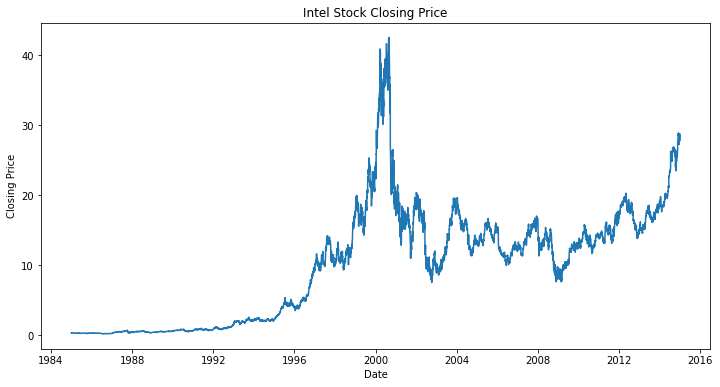

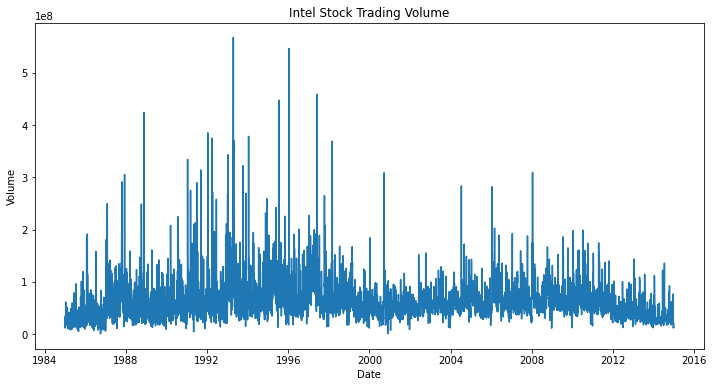

In [3]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Intel Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Plot trading volume
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'])
plt.title('Intel Stock Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [4]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (fill with the previous value)
data.fillna(method='ffill', inplace=True)

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


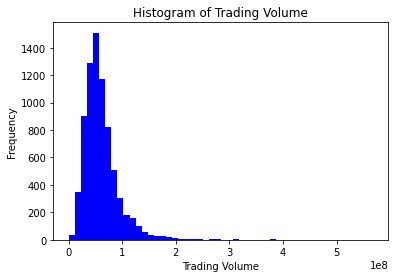

In [5]:
# Plot a histogram of the trading volume
plt.hist(data['Volume'], bins=50, color='blue')
plt.title('Histogram of Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()

It's important to note that the histogram of the data is skewed to the right, meaning that the outliers represent abnormally high trading volume.

In [6]:
# Normalize the closing price and volume
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])
data['Volume'] = scaler.fit_transform(data[['Volume']])

In [7]:
# Calculate the daily return
data['Return'] = data['Close'].pct_change()

# Calculate moving averages
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()

In [13]:
# Create an Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust contamination as needed

# Fit the model to the data
model.fit(data[['Volume']])

# Predict anomalies
predictions = model.predict(data[['Volume']])

# Identify outliers
outliers = data[predictions == -1]

c:\Users\Tejas Srivatsav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


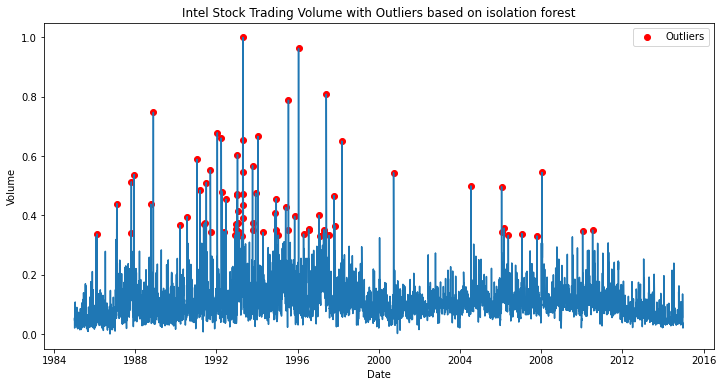

In [14]:
# Plot outliers
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'])
plt.scatter(outliers.index, outliers['Volume'], color='red', label='Outliers')
plt.title('Intel Stock Trading Volume with Outliers based on isolation forest')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()